# $I_{Na,t}$ модель

In [1]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import division

In [3]:
import bokeh
import bokeh.plotting as bp
from bokeh.models import ColumnDataSource, Range1d

from ipywidgets import interact

In [4]:
bp.output_notebook()

BokehJS successfully loaded.

In [5]:
import PyDSTool as dst
from PyDSTool.Toolbox import phaseplane as pp

## Модель $I_{Na,t}$

\begin{equation}
C\dot{V} = I - (\bar{g}_{Na}m_\infty(V)^3h(V-E_{Na}) + gl(V-El))
\end{equation}

\begin{equation}
\tau_h \dot{h} = (h_\infty(V) - h)
\end{equation}

\begin{equation}
x_\infty =  \frac{1}{1 + \exp(\frac{V_{1/2}-V}{k})}
\end{equation}

In [24]:
nat_pset = dict(
    I = 0.0,
    El = -70.0,
    Ena = 60.0,
    gl = 1.0,
    gna = 15.0,
    minf_vhalf = -40.,
    minfk = 15.,
    hinf_vhalf = -62.,
    hinfk = -7,
    htau = 5.0
)

In [25]:
pset_str = ';\n'.join(['{k}=dst.Par({v},"{k}")'.format(k=k,v=v) for k,v in nat_pset.items()])
print pset_str
exec(pset_str)

Ena=dst.Par(60.0,"Ena");
hinf_vhalf=dst.Par(-62.0,"hinf_vhalf");
El=dst.Par(-70.0,"El");
I=dst.Par(0.0,"I");
minf_vhalf=dst.Par(-40.0,"minf_vhalf");
minfk=dst.Par(15.0,"minfk");
gna=dst.Par(15.0,"gna");
gl=dst.Par(1.0,"gl");
hinfk=dst.Par(-7,"hinfk");
htau=dst.Par(5.0,"htau")


In [26]:
V = dst.Var('V')
h = dst.Var('h')

In [27]:
boltzman = dst.Fun(1./(1. + dst.Exp(('Vhalf'- V)/'bk')), ['Vhalf','bk'], 'boltzman')
minf = boltzman(minf_vhalf,minfk)
hinf = boltzman(hinf_vhalf,hinfk)

In [28]:
vtest = linspace(-89, 45, 250)

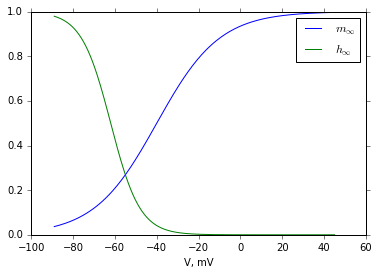

In [29]:
plot(vtest, eval(str(minf.eval(V='vtest', Exp='np.exp', **nat_pset))))
plot(vtest, eval(str(hinf.eval(V='vtest', Exp='np.exp',**nat_pset))))
xlabel(u'V, mV'); legend(('$m_\infty$', '$h_\infty$'),loc='best')

### Уравнения системы

In [30]:
dh = (hinf-h)/htau

In [31]:
iNa = gna*(V-Ena)*minf**3*h
ileak = gl*(V-El)
dV = I - (ileak + iNa )
print dV

I-(gl*(V-El)+gna*(V-Ena)*Pow(1.0/(1.0+Exp((minf_vhalf-V)/minfk)),3)*h)


In [32]:
Iinf =  gna*(V-Ena)*minf**3*hinf + ileak
# vnull = ... # Fill in

In [36]:
Nat_model = dst.args(
    name = 'nat',
    pars = nat_pset,
    varspecs = {'V':dV, 'h':dh},
    tdomain=[0,250], 
    xdomain=dict(V=[-150, 60], h=[0,1]),
    ics = {'V':-70,'h':0})

In [37]:
odeset = dst.Generator.Vode_ODEsystem(Nat_model)

In [38]:
traj = odeset.compute('test')
pts = traj.sample(dt=0.1)

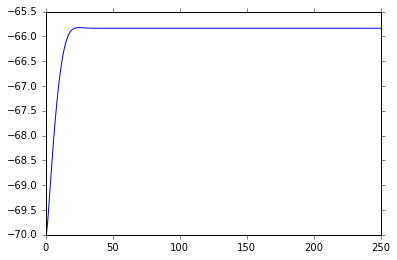

In [39]:
plot(pts['t'], pts['V'])